Tokenizing Text and Counting Word Frequencies

<h2> Lesson Goals </h2>

You will tokenize the text from Book 1 of The Republic by Plato. After the text is cleaned you will work on being able to analyze the text to count the frequencies of words and learn information from the words in the text on Python. You will also upload this file to Voyant and analyze the text. You can then compare information you receive from Python analysis and Voyant analysis

<h2> Files Needed For This Lesson: </h2>
<ul>
    <li> book1_republic_plato.txt (included in this repo, cleaned text of Book 1 from The Republic by Plato)
</ul>

<h4> Open a File </h1>
<p>First you want to open the file ("book1_republic_plato.txt") and read the file as a single string to store in the variable text. Recall that f is a file object that is temporarily made in order to interact with the file.</p>

In [2]:
filename = "book1_republic_plato.txt"
with open(filename, "r") as f:
    text = f.read()

<h4> </h4>

<h4> Create Tokens </h4>
<p> You can split the text into tokens by calling .split() on the text. Note this splits the text at every blank space. </p>

In [3]:
tokens = text.split()
print(tokens)

['I', 'went', 'down', 'yesterday', 'to', 'the', 'Piraeus', 'with', 'Glaucon', 'the', 'son', 'of', 'Ariston,', 'that', 'I', 'might', 'offer', 'up', 'my', 'prayers', 'to', 'the', 'goddess', '(Bendis,', 'the', 'Thracian', 'Artemis.);', 'and', 'also', 'because', 'I', 'wanted', 'to', 'see', 'in', 'what', 'manner', 'they', 'would', 'celebrate', 'the', 'festival,', 'which', 'was', 'a', 'new', 'thing.', 'I', 'was', 'delighted', 'with', 'the', 'procession', 'of', 'the', 'inhabitants;', 'but', 'that', 'of', 'the', 'Thracians', 'was', 'equally,', 'if', 'not', 'more,', 'beautiful.', 'When', 'we', 'had', 'finished', 'our', 'prayers', 'and', 'viewed', 'the', 'spectacle,', 'we', 'turned', 'in', 'the', 'direction', 'of', 'the', 'city;', 'and', 'at', 'that', 'instant', 'Polemarchus', 'the', 'son', 'of', 'Cephalus', 'chanced', 'to', 'catch', 'sight', 'of', 'us', 'from', 'a', 'distance', 'as', 'we', 'were', 'starting', 'on', 'our', 'way', 'home,', 'and', 'told', 'his', 'servant', 'to', 'run', 'and', 'bid

<h4> Length </h4> 
<p> You can see the length of the amount of tokens by calling the function len() on tokens.</p>

In [4]:
num_tokens = len(tokens)
print (num_tokens)

12318


<h4> Amount of Same Tokens </h4>
<p> By using set(), it will remove all the duplicate words. Note set is case sensitive, so to make it case insensitive, you can make all the tokens lowercase by converting the list into a string and using .lower() </p>

In [5]:
num_token_types = len(set(tokens))
print (num_token_types)
tokens_case = str(tokens).lower().split()
num_token_types_case = len(set(tokens_case))
print (num_token_types_case)

2552
2448


<h4> Removing Punctuation Differences </h4>
<p> By using .isalpha(), you can only include characters that are in the alphabet

In [6]:
tokens_alpha = []
for token in tokens:
    token = token.lower()
    if token.isalpha():
        tokens_alpha.append(token)

tokens_alpha_set = len(set(tokens_alpha))

print (tokens_alpha_set)
                       

1400


<h4> Frequency </h4>
<p> If we import the Counter collection from library we can use a function supplied by the library
 to count to most common words that show up in the text</p>

In [7]:
from collections import Counter

word_freq = Counter(tokens_alpha)
most_common = word_freq.most_common(50)

for word, freq in most_common:
    print(f"{word}: {freq}")

the: 655
and: 495
to: 426
of: 401
is: 320
i: 286
that: 259
he: 219
you: 218
a: 213
not: 194
in: 158
be: 150
or: 132
but: 127
are: 116
for: 107
which: 92
his: 90
have: 89
what: 88
as: 86
they: 84
would: 76
do: 76
we: 75
who: 72
if: 62
when: 62
will: 62
good: 62
by: 60
just: 56
with: 54
then: 52
at: 50
their: 49
justice: 49
has: 47
one: 47
than: 45
any: 45
your: 44
an: 40
art: 40
my: 39
was: 39
man: 39
say: 39
may: 38


<h4>Introduction to spaCy</h4>
<p> </p>

In [8]:
%pip install spacy
%run -m spacy download en_core_web_md

import spacy
nlp = spacy.load("en_core_web_md")
doc = nlp(text)

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 61.3 MB/s eta 0:00:0000:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
ents = [(e.text, e.label_) 
        for e in doc.ents 
        if e.label_ not in ("CARDINAL", "ORDINAL")]

for ent in ents:
    print(ent)

('yesterday', 'DATE')
('Piraeus', 'PERSON')
('Glaucon', 'GPE')
('Ariston', 'PERSON')
('Bendis', 'PERSON')
('Thracian', 'NORP')
('Thracians', 'NORP')
('Cephalus', 'ORG')
('Glaucon', 'PERSON')
('a few minutes Polemarchus', 'TIME')
('Adeimantus', 'ORG')
('Glaucon', 'ORG')
('Niceratus', 'ORG')
('Nicias', 'PERSON')
('Polemarchus', 'PERSON')
('Socrates', 'PRODUCT')
('Glaucon', 'PERSON')
('Adeimantus', 'ORG')
('Polemarchus', 'PERSON')
('night', 'TIME')
('Glaucon', 'ORG')
('Polemarchus', 'NORP')
('Lysias', 'PERSON')
('Euthydemus', 'PERSON')
('Thrasymachus the Chalcedonian', 'WORK_OF_ART')
('Charmantides', 'GPE')
('Paeanian', 'NORP')
('Aristonymus', 'GPE')
('Cephalus', 'ORG')
('Polemarchus', 'GPE')
('Socrates', 'PERSON')
('Piraeus', 'PERSON')
('Cephalus', 'ORG')
('Socrates', 'PERSON')
('Socrates', 'PERSON')
('Sophocles', 'PERSON')
('Sophocles', 'PERSON')
('Socrates', 'PRODUCT')
('Cephalus', 'ORG')
('Themistocles', 'ORG')
('Athenian', 'NORP')
('Cephalus', 'ORG')
('Socrates', 'PERSON')
('Lysanias

In [11]:
filtered = [token.text for token in doc if token.is_alpha and not token.is_stop]
word_freq = Counter(filtered)
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

said: 110
good: 77
justice: 73
man: 57
Yes: 48
art: 44
unjust: 40
interest: 40
Thrasymachus: 37
replied: 36


<h4> Creating a Word Cloud </h4>
<p> If we install the wordcloud library we can create a word cloud that displays the most frequent words in the text </p>

Note: you may need to restart the kernel to use updated packages.


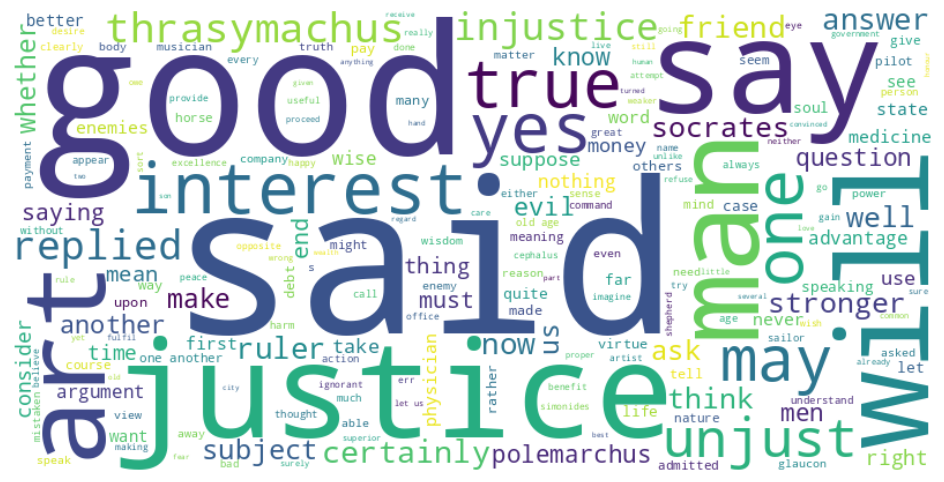

In [ ]:
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_lower = text.lower()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_lower)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> Using Voyant Tools </h4>
<p> Using Python to analyze text can be overly complicated and confusing, especially with little coding experience. Voyant Tools makes it a lot easier to analyze text and do a lot of the same things that can be done with python. https://voyant-tools.org/</p>
<p> To use Voyant, simply upload a text file, such as the one used in this lesson, and Voyant will automatically generate a suite of visualizations, including:
<ul>
<li> Word clouds to show the most frequent terms </li>
<li> Frequency graphs that look at how a word is used over time </li>
</ul>

These tools allow users to explore texts interactively and gain quick insights into patterns of language, themes, and repetition—similar to what we’ve done in Python. But it is a lot less complicated and has a very user friendly interface</p>

<h4> Word Clouds in Voyant</h4>
<p> After uploading your file onto Voyant Tools, to the left of your screen is a word cloud.  </p>
<p> You can adjust the amount of words displayed by using the slidder underneath the word cloud. </p>
<p> Does it look similar or different to the word cloud created using Python?</p> 
<p> Why might there be these differences or similarities? </p>

<h4> Word Frequency in Voyant Tools</h4>
<p> To the bottom left of the screen it has a summary. It says how many total words are in the text and how many unique forms of words are in the text. This is similar to us taking the length of the tokens and the length of the tokens set in Python. </p>
<p> Are the amount of words the same? Are the amount of unique forms of words the same? What contributes to these similarities or differences?</p>
<p> In this summary section, it also labels the most frequent words. This is similar to when we used Counter in Python to count the most frequent words. You can use the slidder at the bottom of the summary section to see more or less terms. Are the most frequent words the same? What contributes to these similarities or differences?</p>

<h4> Voyant Tools vs. Python text analysis </h4>
<p> As you have learned both Python and Voyant Tools are great ways to analysize large texts to help identify patterns and themes. Some benefits to Python is it can be easier to manipulate and do specific things, but as a disadvantage it requires a lot of familiarity with code. Voyant Tools on the otherhand requires no familiarity with code, but can be overwhelming with data and is harder to manipulate because it is premade.</p>